In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configure display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [4]:
# Set plot style
sns.set_style("whitegrid")

### Task 1: The Dataset
- Loading and Familiarizing with the Data
- Are there any interesting things that stand out?

In [5]:
# Defining the path to dataset
file_path = 'ml-engineer-dataset.csv'


In [6]:
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found! Please put it in the correct directory.")
    exit()

Dataset loaded successfully from: ml-engineer-dataset.csv


In [7]:
# Initial Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   contract-delivery        43847 non-null  object 
 1   demand-forecast          43847 non-null  float64
 2   temperature-normal       43847 non-null  float64
 3   temperature-forecast     43847 non-null  float64
 4   solar-forecast           43847 non-null  float64
 5   day-ahead-auction-price  43847 non-null  float64
 6   wind-forecast            43847 non-null  float64
 7   day-ahead-auction-time   43847 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.7+ MB


In [ ]:
# Thoughts:
# Only two columns are found to be of object (string) datatype --> `contract-delivery` and `day-ahead-auction-time`
# No missing values, i.e., non-null. No need for imputation.

In [9]:
# First 5 rows
print(df.head())

           contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
0  2020-01-01 00:00:00+00:00         43471.50            1.317628                   0.6             0.0                    38.60        7019.50  2019-12-31 11:00:00+00:00
1  2020-01-01 01:00:00+00:00         42555.50            1.285980                   0.3             0.0                    36.55        7407.00  2019-12-31 11:00:00+00:00
2  2020-01-01 02:00:00+00:00         42448.25            1.224420                  -0.1             0.0                    32.32        7540.50  2019-12-31 11:00:00+00:00
3  2020-01-01 03:00:00+00:00         42567.75            1.169376                  -0.4             0.0                    30.85        7802.75  2019-12-31 11:00:00+00:00
4  2020-01-01 04:00:00+00:00         42209.00            1.101194                  -0.7             0.0                    30.14        7805.75  

In [10]:
# Last 10 rows:")
print(df.tail(10))

               contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
43837  2024-12-31 13:00:00+00:00         55859.00            3.590067                   2.8          6948.0                    76.84       24589.50  2024-12-30 11:00:00+00:00
43838  2024-12-31 14:00:00+00:00         54947.50            3.293482                   2.1          2520.5                    82.07       27248.50  2024-12-30 11:00:00+00:00
43839  2024-12-31 15:00:00+00:00         54901.75            2.769080                   1.3           123.5                    83.67       29551.25  2024-12-30 11:00:00+00:00
43840  2024-12-31 16:00:00+00:00         56314.00            2.488333                   0.9             2.5                    83.25       30399.00  2024-12-30 11:00:00+00:00
43841  2024-12-31 17:00:00+00:00         56915.00            2.249007                   0.9             1.5                  

In [11]:
# Thoughts:
# 'contract-delivery' progresses hourly
# while 'day-ahead-auction-time' updates daily for 24 new contracts (single contract per hour).

In [12]:
# Statistics
print(df.describe())

       demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast
count     43847.000000        43847.000000          43847.000000    43847.000000             43847.000000   43847.000000
mean      54168.834658           10.027417             11.171371     6110.825530               107.447477   14793.633972
std        9232.674783            6.724638              7.429299     9450.017605               105.707266   10952.121262
min       30544.750000           -0.119118            -11.200000        0.000000              -500.000000      46.500000
25%       46634.625000            3.528642              5.400000        1.500000                41.350000    5880.000000
50%       54049.250000            9.707157             10.600000      188.250000                81.740000   11889.750000
75%       61762.125000           15.601056             16.800000     9680.125000               129.705000   21702.500000
max       77585.750000          

In [13]:
# Thoughts:
# row 'min' has negative values. Looks like high renewable penetration.
# happens where supply (especially renewables) exceeds demand, and generators might pay to offload electricity to avoid grid instability.
# row 'max' high price spikes: 2325 Eur 
# Model must be able to predict these values and outliers.

In [14]:
# Incorrect data types --> Data Type Conversion
# `contract-delivery` and `day-ahead-auction-time` are strings. They should ideally be ´datetime` objects.
df['contract-delivery'] = pd.to_datetime(df['contract-delivery'])
df['day-ahead-auction-time'] = pd.to_datetime(df['day-ahead-auction-time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   contract-delivery        43847 non-null  datetime64[ns, UTC]
 1   demand-forecast          43847 non-null  float64            
 2   temperature-normal       43847 non-null  float64            
 3   temperature-forecast     43847 non-null  float64            
 4   solar-forecast           43847 non-null  float64            
 5   day-ahead-auction-price  43847 non-null  float64            
 6   wind-forecast            43847 non-null  float64            
 7   day-ahead-auction-time   43847 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6)
memory usage: 2.7 MB


In [15]:
# Sorting and Unique Identifiers
# Mulitple rows with same 'day-ahead-auction-time' found. So, sorting this group further by 'contract-delivery'
# ensuring no data leak while training 
# info available before the auction time must be used for prediction 

df = df.sort_values(by=['day-ahead-auction-time', 'contract-delivery']).reset_index(drop=True)

In [16]:
# Check for uniqueness of 'contract-delivery' as a row identifier
if df['contract-delivery'].is_unique:
    print("Well-informed: Unique event for each row is identified.")
else:
    print("Event is NOT unique or found an issue.")

Well-informed: Unique event for each row is identified.


In [17]:
# Check for duplicates across all columns
if df.duplicated().any():
    print(f"Duplicate rows found! Number of duplicate rows: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [18]:
# Missing values analysis
print(df.isnull().sum())

contract-delivery          0
demand-forecast            0
temperature-normal         0
temperature-forecast       0
solar-forecast             0
day-ahead-auction-price    0
wind-forecast              0
day-ahead-auction-time     0
dtype: int64


In [117]:
# Relationship b/n contract-delivery & day-ahead-auction-time
df['time_difference'] = (df['contract-delivery'] - df['day-ahead-auction-time']).dt.total_seconds() / 3600
print("\n'time_difference' (hours between auction and delivery) Description:")
print(df['time_difference'].describe())


'time_difference' (hours between auction and delivery) Description:
count    43847.000000
mean        23.500376
std          6.922324
min         12.000000
25%         18.000000
50%         24.000000
75%         29.500000
max         36.000000
Name: time_difference, dtype: float64


In [20]:
# Thoughts:
# This is the day-ahead auction market structure
# Shortest lag/'min' difference = 12 hours (00:00 delivery, auction at 12:00 previous day)
# Longest lag/'max' difference = 36 hours


In [21]:
# Assuming provided timestamps are in UTC.
# CET is UTC+1 during standard time, UTC+2 during daylight saving.

# Let's re-calculate time differences based on UTC delivery and auction times.
# The calculation `df['contract-delivery'] - df['day-ahead-auction-time']` correctly gives the timedelta.


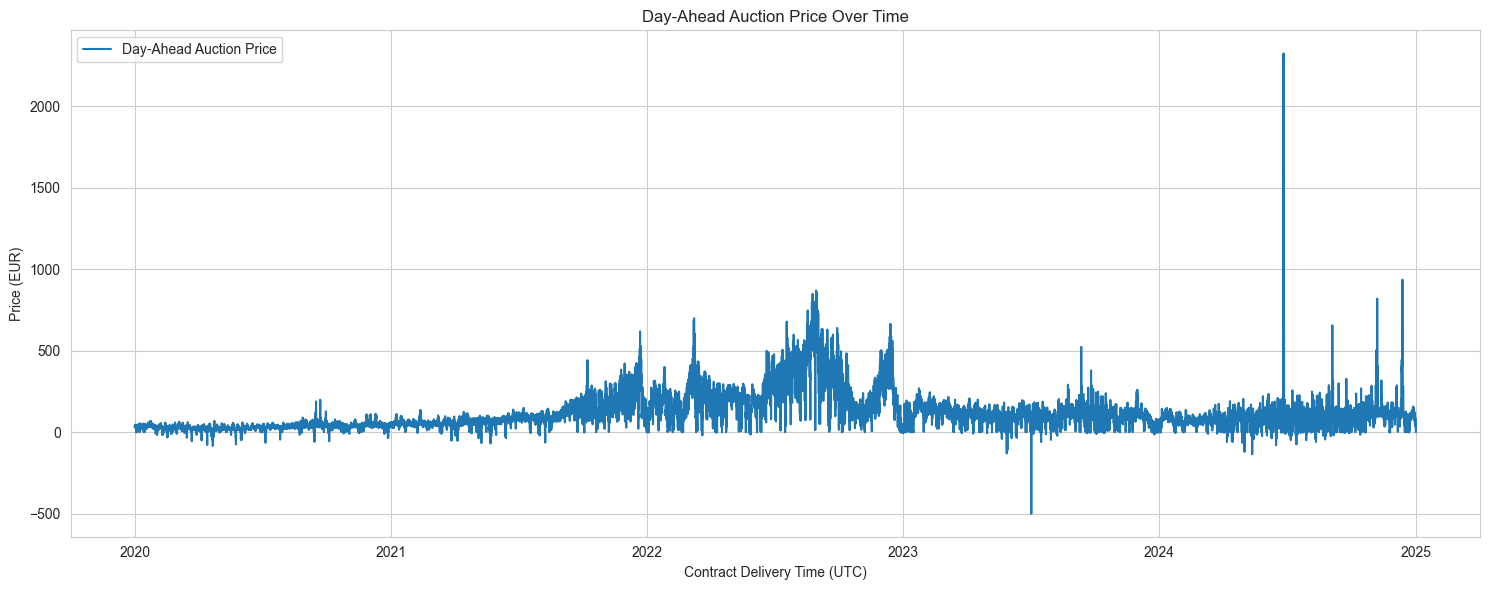

In [22]:
# Visualisation Key data Distributions and Time Series Patterns

# Day-Ahead Auction Price Over Time
plt.figure(figsize=(15, 6))
plt.plot(df['contract-delivery'], df['day-ahead-auction-price'], label='Day-Ahead Auction Price')
plt.title('Day-Ahead Auction Price Over Time')
plt.xlabel('Contract Delivery Time (UTC)')
plt.ylabel('Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Thoughts:
# spikes and negative prices were visible. High demand & low supply vice-versa.
# high volatile & have non linear relations 

Text(0, 0.5, 'Frequency')

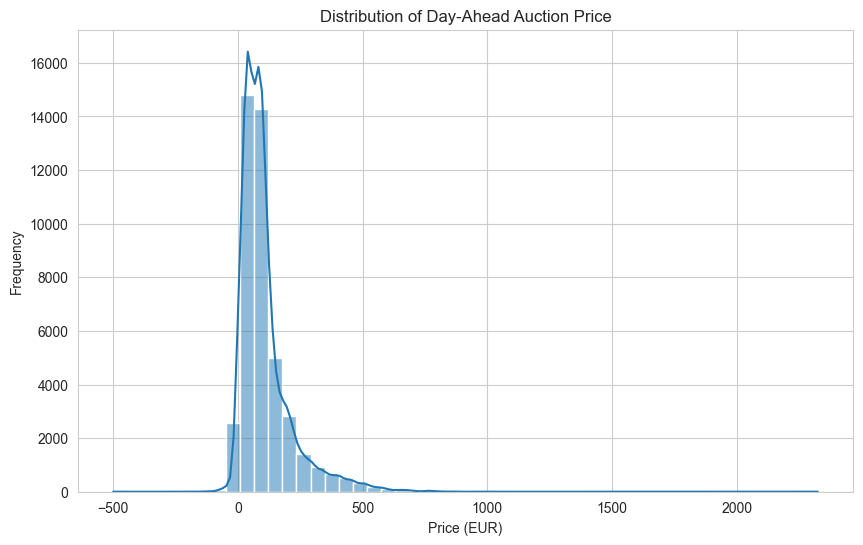

In [107]:
# Day-Ahead Auction Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['day-ahead-auction-price'], bins=50, kde=True)
plt.title('Distribution of Day-Ahead Auction Price')
plt.xlabel('Price (EUR)')
plt.ylabel('Frequency')

In [25]:
# Thoughts:
# distribution is highly right-skewed

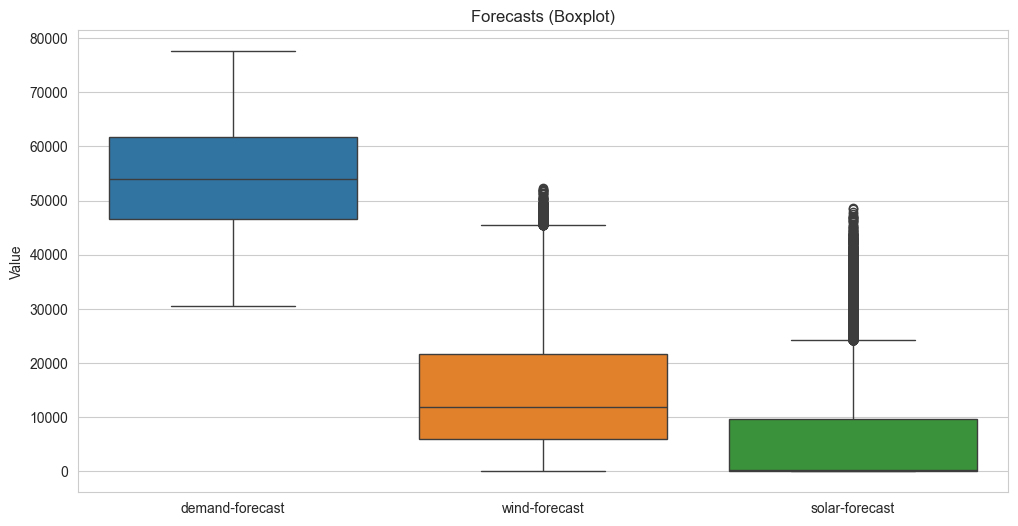

In [110]:
# Forecasts Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['demand-forecast', 'wind-forecast', 'solar-forecast']])
plt.title("Forecasts (Boxplot)")
plt.ylabel("Value")
plt.show()

Text(0, 0.5, 'Frequency')

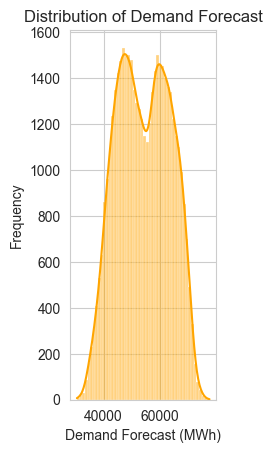

In [26]:
# Demand Forecast Distribution

plt.subplot(1, 3, 2)
sns.histplot(df['demand-forecast'], bins=50, kde=True, color='orange')
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast (MWh)')
plt.ylabel('Frequency')

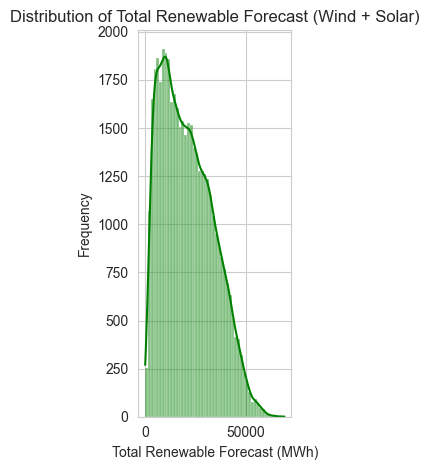

In [27]:
# Total Renewable Forecast

plt.subplot(1, 3, 3)
sns.histplot(df['wind-forecast'] + df['solar-forecast'], bins=50, kde=True, color='green')
plt.title('Distribution of Total Renewable Forecast (Wind + Solar)')
plt.xlabel('Total Renewable Forecast (MWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [28]:
# Thoughts:
# distribution is right-skewed

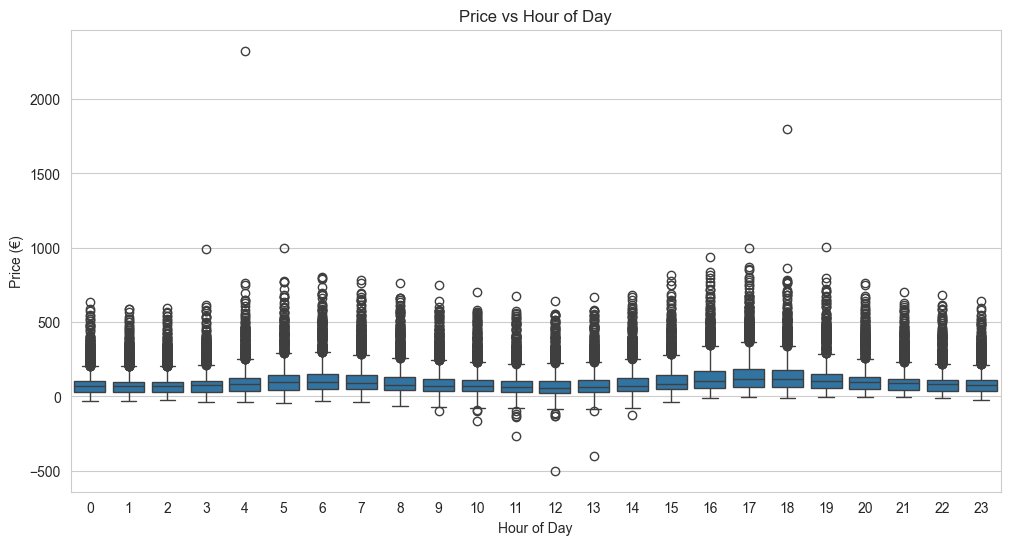

In [111]:
# Price vs Hour of Day
df['hour'] = df['contract-delivery'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='day-ahead-auction-price', data=df)
plt.title("Price vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Price (€)")
plt.show()

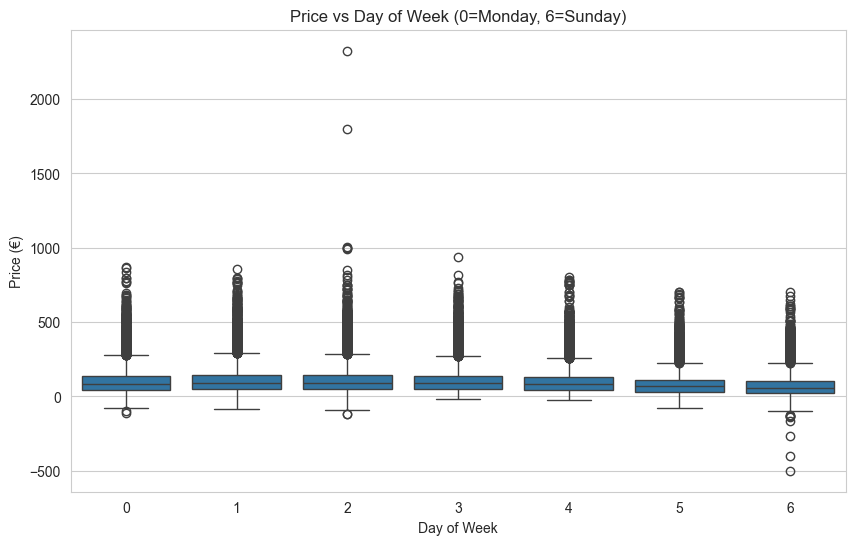

In [112]:
# Price vs Day of Week
df['weekday'] = df['contract-delivery'].dt.dayofweek # 0 = Monday
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='day-ahead-auction-price', data=df)
plt.title("Price vs Day of Week (0=Monday, 6=Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Price (€)")
plt.show()

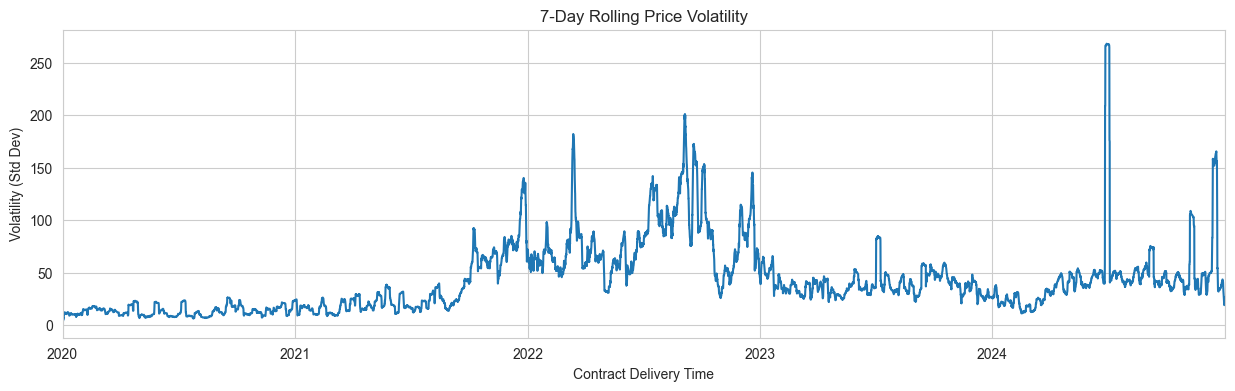

In [113]:
# Rolling Volatility
df['rolling_volatility'] = df['day-ahead-auction-price'].rolling(window=24*7, min_periods=1).std()
plt.figure(figsize=(15, 4))
df.set_index('contract-delivery')['rolling_volatility'].plot(title='7-Day Rolling Price Volatility');
plt.ylabel("Volatility (Std Dev)")
plt.xlabel("Contract Delivery Time")
plt.show()

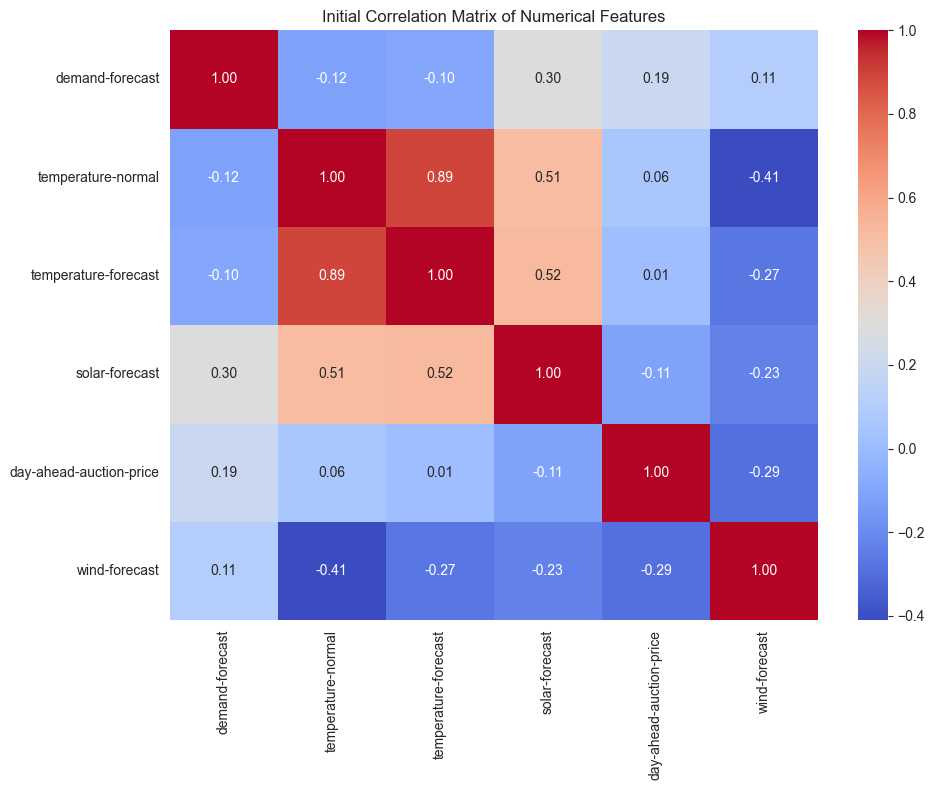

                         demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast
demand-forecast                 1.000000           -0.115556             -0.095990        0.299509                 0.194064       0.107392
temperature-normal             -0.115556            1.000000              0.892352        0.513392                 0.058104      -0.410359
temperature-forecast           -0.095990            0.892352              1.000000        0.520240                 0.012175      -0.268210
solar-forecast                  0.299509            0.513392              0.520240        1.000000                -0.108085      -0.231720
day-ahead-auction-price         0.194064            0.058104              0.012175       -0.108085                 1.000000      -0.290764
wind-forecast                   0.107392           -0.410359             -0.268210       -0.231720                -0.290764       1.000000


In [ ]:
# Correlation Matrix during this phase
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Initial Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
print(corr_matrix)

In [30]:
# Thoughts:
# auction price has a positive correlation with demand forecase (0.19)
# -- > higher the demand higher the prices
# auction price has a negative correl with wind (-0.29) & solar (-0.11) forecast
# -- > solar is available only during daylight time, hence weaker correl
# temp-normal +ive correl with solar forecast (0.51)
# -- > more sun during warmer periods
# wind forecase has -ve correl with temp-normal (-0.41) & temp forecast (-0.27)
# -- > may be due to season. colder time means low normal temp and are windier

In [ ]:
# for linear models
#-- > we might not need both temp-normal & temp-forecast, bcz they have high correl

### Task 2: Building a Baseline Model
- we'll use temporal features & direct forecasts.

In [32]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [119]:
# Ensuring df is the original, full DataFrame with 'hour' and 'weekday' from Task 1 EDA
if 'hour' not in df.columns:
    df['hour'] = df['contract-delivery'].dt.hour
if 'weekday' not in df.columns:
    df['weekday'] = df['contract-delivery'].dt.dayofweek # Monday=0
if 'month' not in df.columns:
    df['month'] = df['contract-delivery'].dt.month

In [141]:
# Feature Engineering for Baseline
df['temperature_diff'] = df['temperature-forecast'] - df['temperature-normal']

In [143]:
# In a day-ahead auction, all 24 hourly prices for the NEXT day are released SIMULTANEOUSLY at 12:00 CET.
# Therefore, any lagged feature must only use prices from previous delivery days' auctions.
# cannot use info from same delivery day's outcome
# that would not be known at auction time. preventing 'peeking into the future'/data leakage.


# Create a copy of the df for lagging operations to ensure original index is preserved
# Sort by 'contract-delivery' to ensure chronological order within groups.

df_for_lags = df.sort_values(by='contract-delivery').copy()


In [ ]:
# lag_24_price: Price for same hour, 1 day prior.
# using 'Group by' 'hour' to ensure we get correct previous day's value for that specific hour.
# `shift(24)` shifts by 24 rows within that group.
df['lag_24_price'] = df_for_lags.groupby('hour')['day-ahead-auction-price'].shift(24).reindex(df.index)

In [124]:
# lag_168_price: Price for same hour, 7 days prior --> same hour, same day of week, last week.
df['lag_168_price'] = df_for_lags.groupby('hour')['day-ahead-auction-price'].shift(168).reindex(df.index)

In [125]:
# prev_day_avg_price --> Avg price of entire previous delivery day.
# For that, we need daily average prices from actual data.
daily_avg_price_calc = df_for_lags.groupby(df_for_lags['contract-delivery'].dt.date)['day-ahead-auction-price'].mean().reset_index()
daily_avg_price_calc.rename(columns={'contract-delivery': 'delivery_date', 'day-ahead-auction-price': 'daily_avg_price'}, inplace=True)

# Then, previous day's average.
daily_avg_price_calc['prev_day_avg_price_calc'] = daily_avg_price_calc['daily_avg_price'].shift(1)

# Merging this back to main DF based on delivery date.
df['delivery_date'] = df['contract-delivery'].dt.date # temp delivery_date column in main df
df = pd.merge(df, daily_avg_price_calc[['delivery_date', 'prev_day_avg_price_calc']], on='delivery_date', how='left')
df.drop('delivery_date', axis=1, inplace=True) # Clean up temp column

In [33]:
# Baseline Feature Engineering
# we'll use 'contract-delivery' to extract 'hour of day' and 'day of week'
df['hour_of_day'] = df['contract-delivery'].dt.hour
df['day_of_week'] = df['contract-delivery'].dt.dayofweek # Monday=0

In [144]:
# Defining features for baseline model.
# using direct forecasts, time, lag, and time features.

baseline_features = [
    'hour', 'weekday', 'month', # Time features
    'demand-forecast', 'wind-forecast', 'solar-forecast', # Direct forecasts
    'temperature-forecast', 'temperature-normal', 'temperature_diff', # Temp features
    'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc' # Corrected lag features
]
target = 'day-ahead-auction-price'

X = df[baseline_features]
y = df[target]

print(f"Baseline features are: {baseline_features}")

Baseline features are: ['hour', 'weekday', 'month', 'demand-forecast', 'wind-forecast', 'solar-forecast', 'temperature-forecast', 'temperature-normal', 'temperature_diff', 'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc']


In [137]:
print(X.head(5))

   hour  weekday  month  demand-forecast  wind-forecast  solar-forecast  temperature-forecast  temperature-normal  temperature_diff  lag_24_price  lag_168_price  prev_day_avg_price_calc
0     0        2      1         43471.50        7019.50             0.0                   0.6            1.317628         -0.717628           NaN            NaN                      NaN
1     1        2      1         42555.50        7407.00             0.0                   0.3            1.285980         -0.985980           NaN            NaN                      NaN
2     2        2      1         42448.25        7540.50             0.0                  -0.1            1.224420         -1.324420           NaN            NaN                      NaN
3     3        2      1         42567.75        7802.75             0.0                  -0.4            1.169376         -1.569376           NaN            NaN                      NaN
4     4        2      1         42209.00        7805.75             0.

In [145]:
# Dropping NaNs rows introduced by corrected lag features
initial_rows_before_lag_drop = len(df)
df_cleaned_baseline = df.dropna(subset=baseline_features + [target]).copy()
print(f"Dropped {initial_rows_before_lag_drop - len(df_cleaned_baseline)} rows due to NaN values from corrected lag features (first 7 days).")
print(f"DataFrame after feature engineering and dropping NaNs: {len(df_cleaned_baseline)} records.")

Dropped 4032 rows due to NaN values from corrected lag features (first 7 days).
DataFrame after feature engineering and dropping NaNs: 39815 records.


In [146]:
# Data Splitting (Fixed-Split 80/20 based on date)
df_cleaned_baseline.sort_values('contract-delivery', inplace=True) # Ensure chronological order
split_date = df_cleaned_baseline['contract-delivery'].quantile(0.8) # 80% for training, 20% for testing

train_data = df_cleaned_baseline[df_cleaned_baseline['contract-delivery'] <= split_date].copy()
test_data = df_cleaned_baseline[df_cleaned_baseline['contract-delivery'] > split_date].copy()

X_train_baseline = train_data[baseline_features]
y_train_baseline = train_data[target]
X_test_baseline = test_data[baseline_features]
y_test_baseline = test_data[target]

print(f"Train set size: {len(train_data)} records, up to {train_data['contract-delivery'].max()}")
print(f"Test set size: {len(test_data)} records, from {test_data['contract-delivery'].min()}")

Train set size: 31852 records, up to 2024-02-04 03:00:00+00:00
Test set size: 7963 records, from 2024-02-04 04:00:00+00:00


In [147]:
# Simple Models (Mean Predictor & Linear Regression)

# evaluation function
def evaluate_model_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.2f}")
    return mae, rmse, r2

In [ ]:
# Baseline 1: Mean Predictor
price_mean = y_train_baseline.mean()
test_data['pred_baseline_mean'] = price_mean
mae_mean, rmse_mean, r2_mean = evaluate_model_metrics(y_test_baseline, test_data['pred_baseline_mean'], "Mean Baseline")

Mean Baseline: MAE: 57.08 | RMSE: 80.67 | R2: -0.45


In [159]:
# Baseline 2: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_baseline, y_train_baseline)
test_data['pred_lr'] = lr_model.predict(X_test_baseline)
print("Linear Regression model trained.")
mae_lr, rmse_lr, r2_lr = evaluate_model_metrics(y_test_baseline, test_data['pred_lr'], "Linear Regression")

Linear Regression model trained.
Linear Regression: MAE: 25.98 | RMSE: 55.48 | R2: 0.32


In [40]:
import sklearn
print(sklearn.__version__)
print(sklearn.__file__)

1.7.0
d:\Machine_learning\Projects\Terra_one_challenge\ML_Challenge_TerraOne\.venv\Lib\site-packages\sklearn\__init__.py


In [161]:
# Thoughts:
# Baseline 1: Mean Predictor
# MAE: 57.08 EUR. Avg error is very high; model is far from actual prices.
# RMSE: 80.67 EUR. Significantly higher than MAE, confirming presence of very large errors.
# R2: -0.45. A negative R2 means this model performs worse than simply predicting mean of test data.
# Essentially, it's a very poor baseline, often due to significant data shifts or high variance.

# Baseline 2: Linear Regression
# MAE: 25.98 EUR. improvement over Mean Predictor, indicating it captures some trends.
# RMSE: 55.48 EUR. Still substantially higher than MAE, suggesting this model also makes significant large errors/outliers (likely missing price spikes).
# R2: 0.32. Positive but low R2, implying model explains only 32% of variance in day-ahead auction prices.
# This confirms simple linear relationships are insufficient for complex power price dynamics.

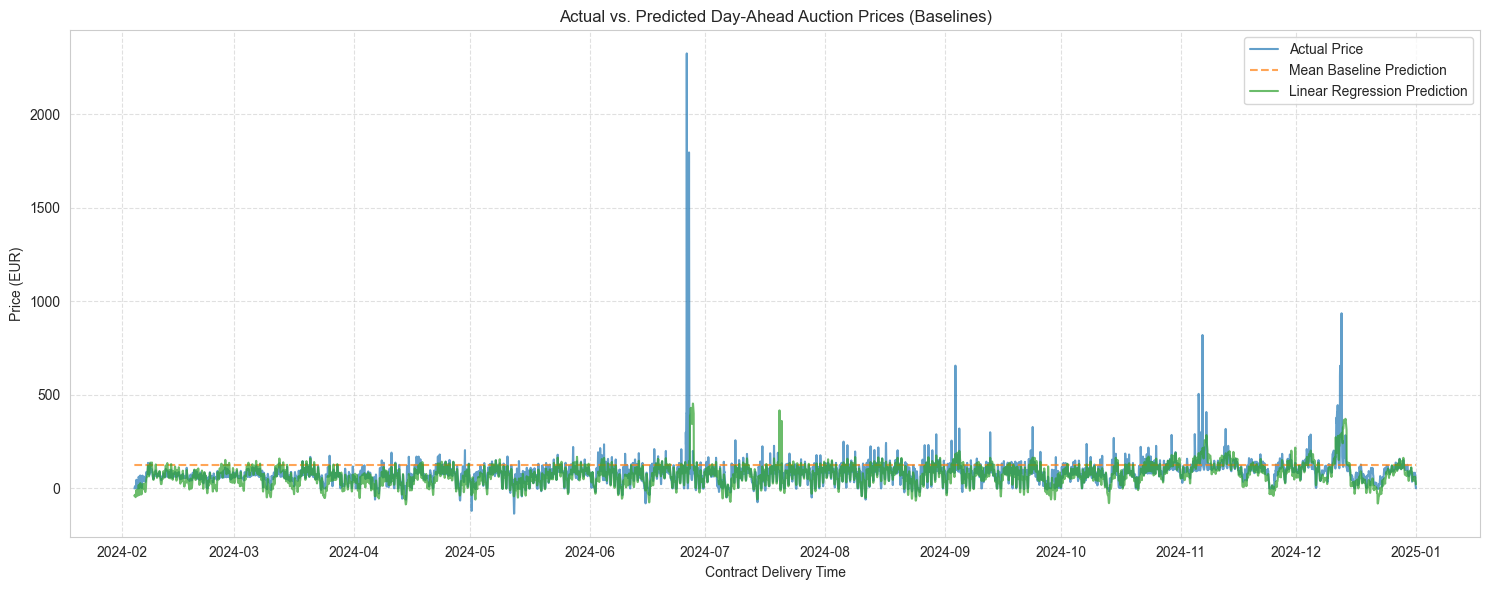

In [164]:
# Time Series Plot Insights (Actual vs. Predicted Day-Ahead Auction Prices - Baselines)
plt.figure(figsize=(15, 6))
plt.plot(test_data['contract-delivery'], test_data[target], label='Actual Price', alpha=0.7)
plt.plot(test_data['contract-delivery'], test_data['pred_baseline_mean'], label='Mean Baseline Prediction', alpha=0.7, linestyle='--')
plt.plot(test_data['contract-delivery'], test_data['pred_lr'], label='Linear Regression Prediction', alpha=0.7)
plt.title('Actual vs. Predicted Day-Ahead Auction Prices (Baselines)')
plt.xlabel('Contract Delivery Time')
plt.ylabel('Price (EUR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [165]:
# Thoughts:
# Mean Baseline is a flat line, showing no ability to track price changes.
# Linear Regression predictions are much smoother and less volatile than actual prices.
# Both baselines severely miss all significant price spikes and deep dips.
# The models are clearly underfitting price volatility and extreme events.
# --> need for advanced features and models capable of capturing non-linear and extreme price behaviors.

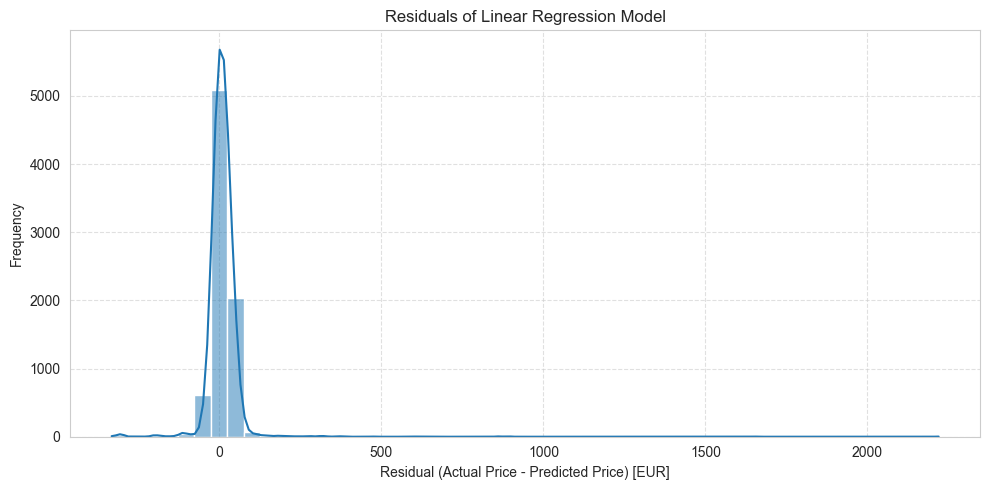

In [166]:
# Residual Plot for Linear Regression
test_data['residual_lr'] = y_test_baseline - test_data['pred_lr']
plt.figure(figsize=(10, 5))
sns.histplot(test_data['residual_lr'], kde=True, bins=50)
plt.title("Residuals of Linear Regression Model")
plt.xlabel("Residual (Actual Price - Predicted Price) [EUR]")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [167]:
# Thoughts:
# Heavily right-skewed, with a tall peak near zero and a long tail extending into positive values.
# Positive residuals (actual > predicted) are frequent and large in magnitude.
# --> Model frequently under-predicts the actual price.

Text(0, 0.5, 'Residuals (EUR)')

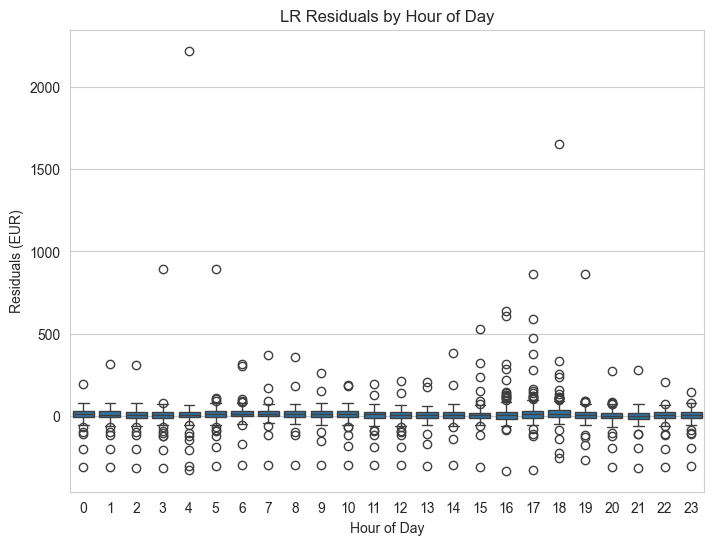

In [174]:
# Residuals Analysis by Time (Hour of Day)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=test_data['contract-delivery'].dt.hour, y=test_data['residual_lr'])
plt.title('LR Residuals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Residuals (EUR)')

In [170]:
# Thoughts:
# Median residual is near zero for most hours.
# However, the spread of residuals varies significantly by hour.
# Hours like 4-5 AM (low demand) and 16-19 PM (evening peak) show larger positive outliers and greater variance.
# --> The baseline model doesn't fully capture the complex, non-linear influence of hourly patterns on residuals.

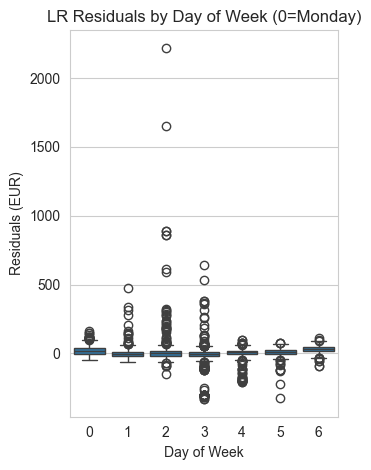

In [ ]:
# Residuals Analysis by Day of Week
plt.subplot(1, 2, 2)
sns.boxplot(x=test_data['contract-delivery'].dt.dayofweek, y=test_data['residual_lr'])
plt.title('LR Residuals by Day of Week (0=Monday)')
plt.xlabel('Day of Week')
plt.ylabel('Residuals (EUR)')
plt.tight_layout()
plt.show()

In [ ]:
# Thoughts:
# Median residual is generally around zero for all days.
# However, weekdays (especially Monday-Thursday: 0-3) show a larger spread of residuals and more significant positive outliers compared to weekends (5-6).
# --> Suggests LR baseline model has more trouble with weekday market dynamics.
# --> Confirms baseline features are inadequate for capturing nuanced temporal effects by day of week.

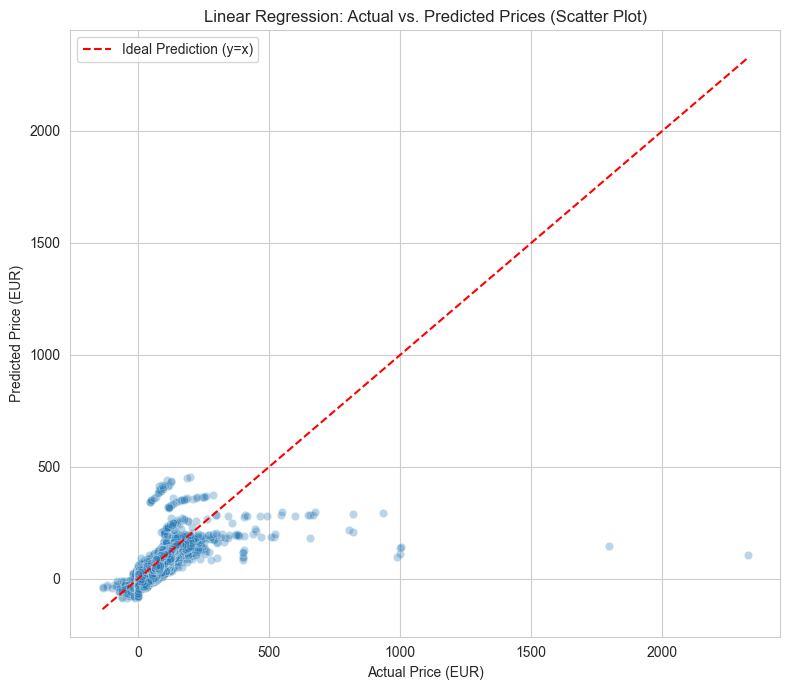

In [184]:
# Scatter Plot: Actual vs. Predicted (Linear Regression)
plt.figure(figsize=(8, 7))
sns.scatterplot(x=y_test_baseline, y=test_data['pred_lr'], alpha=0.3)
plt.plot([y_test_baseline.min(), y_test_baseline.max()], [y_test_baseline.min(), y_test_baseline.max()], 'r--', label='Ideal Prediction (y=x)')
plt.title('Linear Regression: Actual vs. Predicted Prices (Scatter Plot)')
plt.xlabel('Actual Price (EUR)')
plt.ylabel('Predicted Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [185]:
# Thoughts:
# Most predictions cluster tightly at low actual prices, near y=x line.
# For high actual prices, there's a strong downward bias: predicted prices are much lower than actual.
# Struggles with negative prices.
# --> need for non-linear model and features that drive predictions towards extreme values.